In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]).reshape(4, 2, 1)

Y = np.array([
    0,
    1,
    1,
    0
])

In [5]:
weights_l0 = np.random.rand(2, 2)
bias_l1 = np.random.rand(2, 1)
weights_l1 = np.random.rand(1, 2)
bias_l2 = np.random.rand(1, 1)

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
def feed_forward(x):
    z1 = np.dot(weights_l0, x) + bias_l1
    a1 = sigmoid(z1)
    
    z2 = np.dot(weights_l1, a1) + bias_l2
    y_hat = sigmoid(z2)

    return a1, y_hat

In [9]:
a1, prediction = feed_forward(X[0])
prediction
X[0]

array([[0],
       [0]])

In [10]:
def L(y_hat, y):
    return 0.5 * (y_hat - y) ** 2

In [11]:
def dL_dw1(y_hat, y, a1):
    delta = ( y_hat - y ) * ( y_hat * ( 1 - y_hat ) )
    return delta * np.outer(np.ones(1), a1)

def dL_db2(y_hat, y):
    return ( y_hat - y ) * ( y_hat * ( 1 - y_hat ) )

def dL_dw0(y_hat, y, a1, xi):
    delta = dL_dw1(y_hat, y, a1) * ( a1 * ( 1 - a1 ) )
    return delta * np.outer(np.ones(2), x)

def dL_db1(y_hat, y, a1):
    return dL_dw1(y_hat, y, a1) * ( a1 * ( 1 - a1 ) )

In [12]:
def sigmoid_derivative(x):
    return x * (1 - x)

# Output layer gradients
def dL_dw1(y_hat, y, a1):
    delta2 = (y_hat - y) * sigmoid_derivative(y_hat)  # scalar
    return delta2 * a1.T  # shape: (1, hidden_size)

def dL_db2(y_hat, y):
    return (y_hat - y) * sigmoid_derivative(y_hat)  # scalar

# Hidden layer gradients
def dL_dw0(y_hat, y, a1, W1, xi):
    delta2 = (y_hat - y) * sigmoid_derivative(y_hat)  # scalar
    delta1 = np.dot(W1.T, delta2) * sigmoid_derivative(a1)  # shape: (hidden_size, 1)
    return np.dot(delta1, xi.T)  # shape: (hidden_size, input_size)

def dL_db1(y_hat, y, a1, W1):
    delta2 = (y_hat - y) * sigmoid_derivative(y_hat)
    delta1 = np.dot(W1.T, delta2) * sigmoid_derivative(a1)
    return delta1  # shape: (hidden_size, 1)

In [13]:
learning_rate = 0.05
epochs = 100000
losses = []

In [14]:
for i in range(epochs):
    loss = 0
    for i, x in enumerate(X):
        a1, y_hat = feed_forward(x)

        loss += L(y_hat, Y[i])
        
        weights_l0 -= learning_rate * dL_dw0(y_hat, Y[i], a1, weights_l1, x)
        weights_l1 -= learning_rate * dL_dw1(y_hat, Y[i], a1)
        bias_l1 -= learning_rate * dL_db1(y_hat, Y[i], a1, weights_l1)
        bias_l2 -= learning_rate * dL_db2(y_hat, Y[i])

    losses.append(loss / 4)

In [15]:
xn = [i for i in range(epochs)]

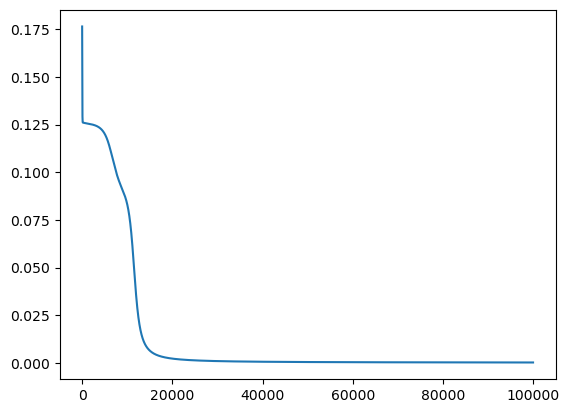

In [16]:
plt.plot(xn, np.array(losses).reshape(epochs))

In [17]:
def classifier(prediction):
    if prediction >= 0.5: return 1
    else: return 0

In [18]:
for i in range(4):
    _, p = feed_forward(X[i]) 
    print(f'Input A: {X[i][0][0]}, Input B: {X[i][1][0]}, Prediction: {p[0][0]}')

Input A: 0, Input B: 0, Prediction: 0.01935247300500009
Input A: 0, Input B: 1, Prediction: 0.9832151819743149
Input A: 1, Input B: 0, Prediction: 0.9832114099447373
Input A: 1, Input B: 1, Prediction: 0.01745269744813966


In [19]:
example_num = 10000
point_A = np.random.rand(example_num).tolist()
point_B = np.random.rand(example_num).tolist()
coords = np.array(list(zip(point_A, point_B)))

In [28]:
pres = [0 for i in range(example_num)]
for i in range(example_num):
    _, p = feed_forward(coords[i].T.reshape(2, 1))
    pres[i] = classifier(p)

In [29]:
colors = ['red' if y == 0 else 'blue' for y in pres]

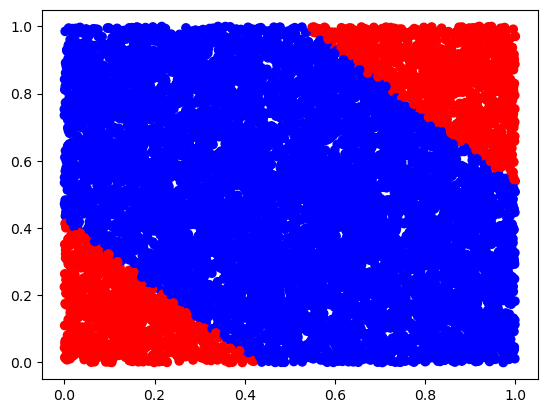

In [30]:
plt.scatter(point_A, point_B, color=colors)